In [1]:
from Levenshtein import distance
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

In [2]:
data_dir = os.path.join("./data", "boxoban-medium", "train")
all_levels = []

level_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".txt")]
for file in level_files:
    with open(file, "r") as f:

        # Split into individual levels
        raw_levels = f.read().split("; ")

        # Remove the first line of each level, which just contains the level number, and replace spaces with dashes
        all_levels += [level[level.find("\n")+1:].strip().replace(" ", "-") for level in raw_levels if level != ""]

In [4]:
MIN_EDIT_DISTANCE = float('inf')
dists = []

for i in tqdm(range(100), desc="Sampling levels"):
    base_level = random.choice(all_levels)

    for level in all_levels:
        dist = distance(base_level, level)

        if dist != 0:
            dists.append(dist)

    MIN_EDIT_DISTANCE = min(MIN_EDIT_DISTANCE, min(dists))

print(f"Minimum edit distance: {MIN_EDIT_DISTANCE}")

Sampling levels: 100%|██████████| 100/100 [01:40<00:00,  1.01s/it]

Minimum edit distance: 2


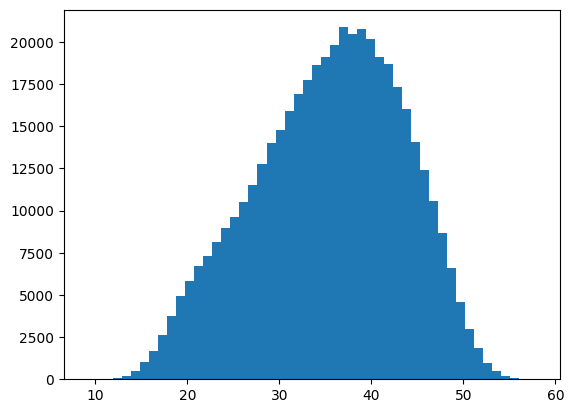

In [7]:
i = 10
plt.hist(dists[i*450000:(i+1)*450000], bins=50)
plt.show()